In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
creditscores=pd.read_csv('/Users/qiuyingduan/Desktop/MMAI/creditscores_dataset.csv')
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score,f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [65]:
Requested_Amount = {'Low':1,'Medium':2,'High':3}
creditscores["RequestedAmount"] = creditscores["RequestedAmount"].map(Requested_Amount)

Dependent = {'No dependent':1,'Less than 2':2,'More than 2':3}
creditscores["Dependents"] = creditscores["Dependents"].map(Dependent)

Monthly_Income = {'Very low':1,'Low':2,'Moderate':3,'High':4,'Very High':5}
creditscores["MonthlyIncome"] = creditscores["MonthlyIncome"].map(Monthly_Income)

Monthly_Expense = {'Very low':1,'Low':2,'Moderate':3,'High':4,'Very high':5}
creditscores["MonthlyExpense"] = creditscores["MonthlyExpense"].map(Monthly_Expense)

Marital_Status = {'Single':1,'Married':2,'Not specified':3}
creditscores["MaritalStatus"] = creditscores["MaritalStatus"].map(Marital_Status)

Credit_Rating = {'Negative':0,'Positive':1}
creditscores["CreditRating"] = creditscores["CreditRating"].map(Credit_Rating)






In [66]:
creditscores

,EducationYear,RequestedAmount,Dependents,MonthlyIncome,MonthlyExpense,MaritalStatus,CreditRating
0,1,1,1,1,1,2,1
1,2,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,3,1,1,1,1,2,1
4,3,1,1,1,1,1,0
...,...,...,...,...,...,...,...
8076,3,1,2,5,5,2,1
8077,3,2,2,5,5,2,0
8078,3,2,3,5,5,2,1
8079,7,2,2,5,5,2,1


In [67]:
#define 0<=EducationYear<=2 is low, 3<=EducationYear<=4 is medium, 5<=EducationYear<=7 is high 
#def Education(row):
    #result = 0
    #if row<3:
        #result = 1
    #if 3<=row<5:
        #result = 2
    #if 5<=row<8:
        #result = 3
    #return result
#creditscores['Education'] = creditscores['EducationYear'].apply(Education)

In [68]:
creditscores

,EducationYear,RequestedAmount,Dependents,MonthlyIncome,MonthlyExpense,MaritalStatus,CreditRating
0,1,1,1,1,1,2,1
1,2,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,3,1,1,1,1,2,1
4,3,1,1,1,1,1,0
...,...,...,...,...,...,...,...
8076,3,1,2,5,5,2,1
8077,3,2,2,5,5,2,0
8078,3,2,3,5,5,2,1
8079,7,2,2,5,5,2,1


In [69]:
creditscores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   EducationYear    8081 non-null   int64
 1   RequestedAmount  8081 non-null   int64
 2   Dependents       8081 non-null   int64
 3   MonthlyIncome    8081 non-null   int64
 4   MonthlyExpense   8081 non-null   int64
 5   MaritalStatus    8081 non-null   int64
 6   CreditRating     8081 non-null   int64
dtypes: int64(7)
memory usage: 442.1 KB


In [70]:
onehot_features = ['RequestedAmount', 'Dependents', 'MonthlyIncome','MonthlyExpense','MaritalStatus']
encoded_features = []

for df in creditscores:
    for feature in onehot_features:
        encoded_feat = OneHotEncoder().fit_transform(creditscores[feature].values.reshape(-1, 1)).toarray()
        n = creditscores[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = creditscores.index
        encoded_features.append(encoded_df)

In [71]:
# *encoded_features gives all encoded features of each of Six onehot_features         
creditscores = pd.concat([creditscores, *encoded_features[:6]], axis=1)


In [72]:
creditscores['EducationYear'].values

array([1, 2, 1, ..., 3, 7, 3])

In [73]:
scaler = StandardScaler()
creditscores['EducationYear']=scaler.fit_transform(creditscores['EducationYear'].values.reshape(-1,1))

In [74]:
creditscores.info

<bound method DataFrame.info of       EducationYear  RequestedAmount  Dependents  MonthlyIncome  \
0         -1.023446                1           1              1   
1         -0.387207                1           1              1   
2         -1.023446                1           1              1   
3          0.249031                1           1              1   
4          0.249031                1           1              1   
...             ...              ...         ...            ...   
8076       0.249031                1           2              5   
8077       0.249031                2           2              5   
8078       0.249031                2           3              5   
8079       2.793986                2           2              5   
8080       0.249031                2           2              5   

      MonthlyExpense  MaritalStatus  CreditRating  RequestedAmount_1  \
0                  1              2             1                1.0   
1                  

In [75]:
drop_cols = ['RequestedAmount','Dependents','MonthlyIncome','MonthlyExpense','MaritalStatus']
creditscores.drop(columns=drop_cols, inplace=True)


In [76]:
creditscores

,EducationYear,CreditRating,RequestedAmount_1,RequestedAmount_2,RequestedAmount_3,Dependents_1,Dependents_2,Dependents_3,MonthlyIncome_1,MonthlyIncome_2,...,MonthlyExpense_2,MonthlyExpense_3,MonthlyExpense_4,MonthlyExpense_5,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,RequestedAmount_1,RequestedAmount_2,RequestedAmount_3
0,-1.023446,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.387207,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.023446,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.249031,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.249031,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,0.249031,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8077,0.249031,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8078,0.249031,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8079,2.793986,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [77]:
x = np.array(creditscores.iloc[:, creditscores.columns != 'CreditRating'])
y = np.array(creditscores.iloc[:, creditscores.columns == 'CreditRating'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [78]:
creditscores

,EducationYear,CreditRating,RequestedAmount_1,RequestedAmount_2,RequestedAmount_3,Dependents_1,Dependents_2,Dependents_3,MonthlyIncome_1,MonthlyIncome_2,...,MonthlyExpense_2,MonthlyExpense_3,MonthlyExpense_4,MonthlyExpense_5,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,RequestedAmount_1,RequestedAmount_2,RequestedAmount_3
0,-1.023446,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.387207,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.023446,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.249031,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.249031,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,0.249031,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8077,0.249031,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8078,0.249031,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8079,2.793986,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [79]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [80]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(x_train, y_train.ravel())


In [91]:
#Trainset f1_score
y_predtrain=logreg.predict(x_train)
f1_score(y_train,y_predtrain)

0.6553468208092486

In [88]:
y_pred = logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test.ravel(), y_pred)

In [89]:
cnf_matrix

array([[ 297,  274],
       [1664, 1806]])

In [90]:
#Test set f1 score
f1_score(y_test,y_pred)

0.6508108108108108

                 precision    recall  f1-score   support

Credit_positive       0.15      0.52      0.23       571
Credit_negative       0.87      0.52      0.65      3470

       accuracy                           0.52      4041
      macro avg       0.51      0.52      0.44      4041
   weighted avg       0.77      0.52      0.59      4041



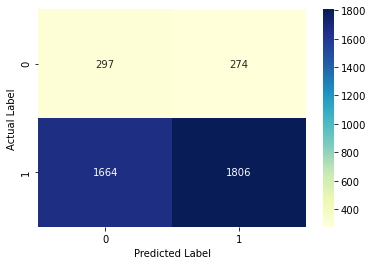

In [63]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Credit_positive', 'Credit_negative']
print(classification_report(y_test, y_pred, target_names=labels))

In [602]:
creditscores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EducationYear      8081 non-null   float64
 1   CreditRating       8081 non-null   int64  
 2   RequestedAmount_1  8081 non-null   float64
 3   RequestedAmount_2  8081 non-null   float64
 4   RequestedAmount_3  8081 non-null   float64
 5   Dependents_1       8081 non-null   float64
 6   Dependents_2       8081 non-null   float64
 7   Dependents_3       8081 non-null   float64
 8   MonthlyIncome_1    8081 non-null   float64
 9   MonthlyIncome_2    8081 non-null   float64
 10  MonthlyIncome_3    8081 non-null   float64
 11  MonthlyIncome_4    8081 non-null   float64
 12  MonthlyIncome_5    8081 non-null   float64
 13  MonthlyExpense_1   8081 non-null   float64
 14  MonthlyExpense_2   8081 non-null   float64
 15  MonthlyExpense_3   8081 non-null   float64
 16  MonthlyExpense_4   8081 

In [603]:
creditscoresPCA=pd.read_csv('/Users/qiuyingduan/Desktop/MMAI/creditscores_dataset.csv')
scaler = StandardScaler()
creditscoresPCA['EducationYear']=scaler.fit_transform(creditscoresPCA['EducationYear'].values.reshape(-1,1))

Requested_Amount = {'Low':1.0,'Medium':2.0,'High':3.0}
creditscoresPCA["RequestedAmount"] = creditscoresPCA["RequestedAmount"].map(Requested_Amount)

Dependent = {'No dependent':1,'Less than 2':2,'More than 2':3}
creditscoresPCA["Dependents"] = creditscoresPCA["Dependents"].map(Dependent)

Monthly_Income = {'Very low':1.0,'Low':2.0,'Moderate':3.0,'High':4.0,'Very High':5.0}
creditscoresPCA["MonthlyIncome"] = creditscoresPCA["MonthlyIncome"].map(Monthly_Income)

Monthly_Expense = {'Very low':1.0,'Low':2.0,'Moderate':3.0,'High':4.0,'Very high':5.0}
creditscoresPCA["MonthlyExpense"] = creditscoresPCA["MonthlyExpense"].map(Monthly_Expense)

Marital_Status = {'Single':1.0,'Married':2.0,'Not specified':3.0}
creditscoresPCA["MaritalStatus"] = creditscoresPCA["MaritalStatus"].map(Marital_Status)

Credit_Rating = {'Negative':0,'Positive':1}
creditscoresPCA["CreditRating"] = creditscoresPCA["CreditRating"].map(Credit_Rating)

In [604]:
creditscoresPCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EducationYear    8081 non-null   float64
 1   RequestedAmount  8081 non-null   float64
 2   Dependents       8081 non-null   int64  
 3   MonthlyIncome    8081 non-null   float64
 4   MonthlyExpense   8081 non-null   float64
 5   MaritalStatus    8081 non-null   float64
 6   CreditRating     8081 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 442.1 KB


In [605]:
creditscoresPCA['Dependents']=scaler.fit_transform(creditscoresPCA['Dependents'].values.reshape(-1,1))
creditscoresPCA['RequestedAmount']=scaler.fit_transform(creditscoresPCA['RequestedAmount'].values.reshape(-1,1))
creditscoresPCA['MonthlyIncome']=scaler.fit_transform(creditscoresPCA['MonthlyIncome'].values.reshape(-1,1))
creditscoresPCA['MonthlyExpense']=scaler.fit_transform(creditscoresPCA['MonthlyExpense'].values.reshape(-1,1))
creditscoresPCA['MaritalStatus']=scaler.fit_transform(creditscoresPCA['MaritalStatus'].values.reshape(-1,1))

xPCA = np.array(creditscoresPCA.iloc[:, creditscoresPCA.columns != 'CreditRating'])
yPCA = np.array(creditscoresPCA.iloc[:, creditscoresPCA.columns == 'CreditRating'])
x_trainPCA, x_testPCA, y_trainPCA, y_testPCA = train_test_split(xPCA, yPCA, test_size=0.5, random_state=0)

In [606]:
creditscoresPCA

,EducationYear,RequestedAmount,Dependents,MonthlyIncome,MonthlyExpense,MaritalStatus,CreditRating
0,-1.023446,-0.683722,-0.998343,-0.970116,-0.473137,0.509060,1
1,-0.387207,-0.683722,-0.998343,-0.970116,-0.473137,-1.639095,1
2,-1.023446,-0.683722,-0.998343,-0.970116,-0.473137,-1.639095,1
3,0.249031,-0.683722,-0.998343,-0.970116,-0.473137,0.509060,1
4,0.249031,-0.683722,-0.998343,-0.970116,-0.473137,-1.639095,0
...,...,...,...,...,...,...,...
8076,0.249031,-0.683722,0.514712,3.075037,6.037586,0.509060,1
8077,0.249031,1.354329,0.514712,3.075037,6.037586,0.509060,0
8078,0.249031,1.354329,2.027768,3.075037,6.037586,0.509060,1
8079,2.793986,1.354329,0.514712,3.075037,6.037586,0.509060,1


In [607]:
#le = LabelEncoder()
#creditscoresPCA['RequestedAmount'] = le.fit_transform(creditscoresPCA['RequestedAmount'])
#creditscoresPCA['Dependents '] = le.fit_transform(creditscoresPCA['Dependents'])
#creditscoresPCA['MonthlyIncome'] = le.fit_transform(creditscoresPCA['MonthlyIncome'])
#creditscoresPCA['MonthlyExpense'] = le.fit_transform(creditscoresPCA['MonthlyExpense'])
#creditscoresPCA['MaritalStatus'] = le.fit_transform(creditscoresPCA['MaritalStatus'])
#creditscoresPCA['CreditRating'] = le.fit_transform(creditscoresPCA['CreditRating'])

In [474]:
creditscoresPCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EducationYear    8081 non-null   float64
 1   RequestedAmount  8081 non-null   int64  
 2   Dependents       8081 non-null   int64  
 3   MonthlyIncome    8081 non-null   int64  
 4   MonthlyExpense   8081 non-null   int64  
 5   MaritalStatus    8081 non-null   int64  
 6   CreditRating     8081 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 442.1 KB


In [557]:
pca = PCA(n_components=3)
#principalComponents = pca.fit_transform (x_trainPCA)
#principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2','PC3'])
#principalDf.head()

train_xPCA = pca.fit_transform(x_trainPCA)
test_xPCA = pca.fit_transform(x_testPCA)

In [614]:
principalDf = pd.DataFrame(data = train_xPCA, columns=['PC1','PC2','PC3']) 
principalDf.head()

,PC1,PC2,PC3
0,-0.223143,-1.987483,0.184751
1,2.096771,1.507464,-1.045582
2,2.246960,0.100749,0.873565
3,-0.750306,0.630763,0.168110
4,0.805045,-1.350747,-0.301969


In [558]:
test_xPCA

array([[-0.16156891,  0.15550824, -0.88296269],
       [-1.06988105,  0.79493589,  1.21322562],
       [-0.67085328, -0.11955398, -0.62408197],
       ...,
       [-0.67085328, -0.11955398, -0.62408197],
       [-0.40600543,  0.38982082, -1.00706287],
       [-0.74107996,  0.60800835,  0.19712244]])

In [569]:
logregPCA = LogisticRegression(class_weight='balanced')
logregPCA.fit(train_xPCA,  y_trainPCA.ravel())
y_predPCA = logregPCA.predict(test_xPCA)
cnf_matrixPCA = confusion_matrix(y_testPCA.ravel(), y_predPCA)

In [570]:
cnf_matrixPCA 

array([[ 314,  257],
       [1622, 1848]])

                 precision    recall  f1-score   support

Credit_positive       0.16      0.55      0.25       571
Credit_negative       0.88      0.53      0.66      3470

       accuracy                           0.54      4041
      macro avg       0.52      0.54      0.46      4041
   weighted avg       0.78      0.54      0.60      4041



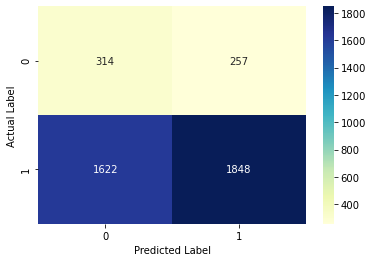

In [572]:
sns.heatmap(pd.DataFrame(cnf_matrixPCA), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Credit_positive', 'Credit_negative']
print(classification_report(y_testPCA, y_predPCA, target_names=labels))

In [537]:
#finalDf = pd.concat([principalDf,creditscoresPCA[['CreditRating']]], axis = 1)
#finalDf.head()

,PC1,PC2,PC3,CreditRating
0,-0.223143,-1.987483,0.184751,1
1,2.096771,1.507464,-1.045582,1
2,2.246960,0.100749,0.873565,1
3,-0.750306,0.630763,0.168110,1
4,0.805045,-1.350747,-0.301969,0


In [575]:
#using only the first component
creditscoresPCA1=pd.read_csv('/Users/qiuyingduan/Desktop/MMAI/creditscores_dataset.csv')
scaler = StandardScaler()
creditscoresPCA1['EducationYear']=scaler.fit_transform(creditscoresPCA1['EducationYear'].values.reshape(-1,1))

Requested_Amount = {'Low':1.0,'Medium':2.0,'High':3.0}
creditscoresPCA1["RequestedAmount"] = creditscoresPCA1["RequestedAmount"].map(Requested_Amount)

Dependent = {'No dependent':1,'Less than 2':2,'More than 2':3}
creditscoresPCA1["Dependents"] = creditscoresPCA1["Dependents"].map(Dependent)

Monthly_Income = {'Very low':1.0,'Low':2.0,'Moderate':3.0,'High':4.0,'Very High':5.0}
creditscoresPCA1["MonthlyIncome"] = creditscoresPCA1["MonthlyIncome"].map(Monthly_Income)

Monthly_Expense = {'Very low':1.0,'Low':2.0,'Moderate':3.0,'High':4.0,'Very high':5.0}
creditscoresPCA1["MonthlyExpense"] = creditscoresPCA1["MonthlyExpense"].map(Monthly_Expense)

Marital_Status = {'Single':1.0,'Married':2.0,'Not specified':3.0}
creditscoresPCA1["MaritalStatus"] = creditscoresPCA1["MaritalStatus"].map(Marital_Status)

Credit_Rating = {'Negative':0,'Positive':1}
creditscoresPCA1["CreditRating"] = creditscoresPCA1["CreditRating"].map(Credit_Rating)

In [576]:
creditscoresPCA1['Dependents']=scaler.fit_transform(creditscoresPCA1['Dependents'].values.reshape(-1,1))
creditscoresPCA1['RequestedAmount']=scaler.fit_transform(creditscoresPCA1['RequestedAmount'].values.reshape(-1,1))
creditscoresPCA1['MonthlyIncome']=scaler.fit_transform(creditscoresPCA1['MonthlyIncome'].values.reshape(-1,1))
creditscoresPCA1['MonthlyExpense']=scaler.fit_transform(creditscoresPCA1['MonthlyExpense'].values.reshape(-1,1))
creditscoresPCA1['MaritalStatus']=scaler.fit_transform(creditscoresPCA1['MaritalStatus'].values.reshape(-1,1))

xPCA1 = np.array(creditscoresPCA1.iloc[:, creditscoresPCA1.columns != 'CreditRating'])
yPCA1 = np.array(creditscoresPCA1.iloc[:, creditscoresPCA1.columns == 'CreditRating'])
x_trainPCA1, x_testPCA1, y_trainPCA1, y_testPCA1 = train_test_split(xPCA1, yPCA1, test_size=0.5, random_state=0)

In [577]:
pca1 = PCA(n_components=1)
train_xPCA1 = pca.fit_transform(x_trainPCA1)
test_xPCA1 = pca.fit_transform(x_testPCA1)
logregPCA1 = LogisticRegression(class_weight='balanced')
logregPCA1.fit(train_xPCA1,  y_trainPCA1.ravel())
y_predPCA1 = logregPCA1.predict(test_xPCA1)
cnf_matrixPCA1 = confusion_matrix(y_testPCA1.ravel(), y_predPCA1)

In [578]:
cnf_matrixPCA1

array([[ 379,  192],
       [2164, 1306]])

                 precision    recall  f1-score   support

Credit_positive       0.15      0.66      0.24       571
Credit_negative       0.87      0.38      0.53      3470

       accuracy                           0.42      4041
      macro avg       0.51      0.52      0.38      4041
   weighted avg       0.77      0.42      0.49      4041



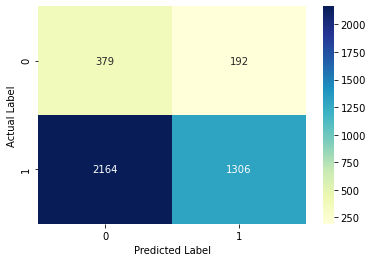

In [580]:
sns.heatmap(pd.DataFrame(cnf_matrixPCA1), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Credit_positive', 'Credit_negative']
print(classification_report(y_testPCA1, y_predPCA1, target_names=labels))